In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
from sklearn.datasets import make_blobs

# Generate isotropic Gaussian blobs for clustering.
X, y, centers = make_blobs(
    # the total number of points equally divided among clusters.
    n_samples=150, 
    # number of features for each sample
    n_features=2, 
    #  number of centers to generate, or the fixed center locations
    centers=4,
    # standard deviation of the clusters
    #cluster_std=1.0,
    # seed for randomization
    random_state=1,
    # return the centers of each cluster
    return_centers=True
)

In [3]:
print('Size:', y.size)
print('Features X, shape', X.shape, ':\n', X[:3], '...')
print('Results y:\n', y)
print('Centers of clasters:\n', centers)

Size: 150
Features X, shape (150, 2) :
 [[-5.84526963 -3.69578386]
 [-6.38481234 -8.4730297 ]
 [-7.23022103 -2.50287503]] ...
Results y:
 [3 2 3 3 1 3 2 0 0 2 3 3 1 1 2 0 2 0 2 3 2 1 1 1 3 3 1 0 0 3 2 1 3 1 1 3 2
 1 1 3 0 0 0 2 1 1 2 0 2 0 0 1 0 1 3 0 2 1 3 1 3 2 3 0 1 3 1 0 2 0 3 2 1 1
 3 0 2 2 1 0 2 0 3 1 3 3 2 3 2 3 3 2 1 1 0 2 0 3 2 1 0 0 0 0 0 1 3 2 0 2 3
 2 0 0 1 1 2 2 3 3 1 1 3 1 3 2 1 3 2 0 2 1 2 1 0 0 2 3 1 0 3 1 0 0 0 2 3 2
 2 0]
Centers of clasters:
 [[-1.65955991  4.40648987]
 [-9.9977125  -3.95334855]
 [-7.06488218 -8.1532281 ]
 [-6.27479577 -3.08878546]]


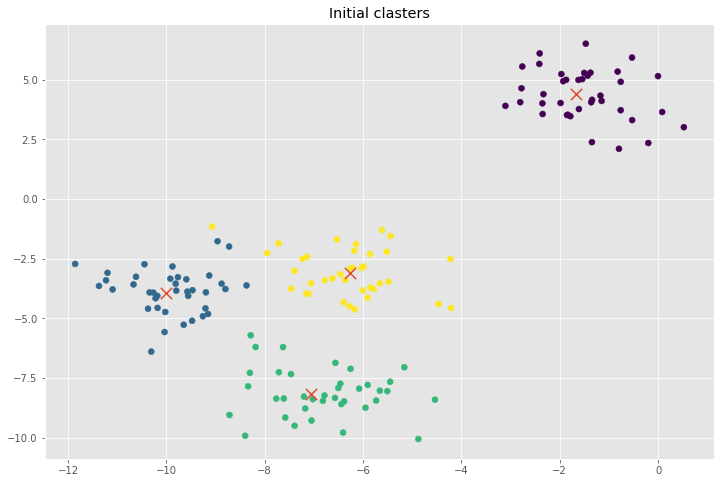

In [4]:
plt.title('Initial clasters')
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=128)

In [5]:
# Попробуем кластеризацией получить те же классы

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    # number of clusters
    n_clusters=4, 
    # inicialization of centroid {‘k-means++’ or ‘random’}
    init='k-means++', 
    # Number of times the algorithm is run with different centroid seeds.
    n_init=10, 
    # Maximum number of iterations of algorithm for a single run.
    #max_iter=300,
    # Relative tolerance consecutive iterations to declare convergence.
    #tol=1e-4,
    # {“lloyd”, “elkan”, “auto”, “full”}
    #algorithm='lloyd',
    # seed for randomization
    random_state=1)

kmeans.fit(X)

labels = kmeans.labels_
inertia = kmeans.inertia_
model_centers = kmeans.cluster_centers_

print('inertia:',inertia)
print('model labels:\n', labels)

inertia: 262.24408647415845
model labels:
 [2 0 2 2 3 2 0 1 1 0 2 2 3 3 0 1 0 1 0 3 0 3 3 3 2 2 3 1 1 2 0 3 2 3 3 2 0
 3 3 2 1 1 1 0 3 3 0 1 0 1 1 3 1 3 2 1 0 3 2 3 2 0 2 1 3 2 3 1 0 1 2 0 3 3
 2 1 0 0 3 1 0 1 2 3 2 2 0 2 0 2 2 0 3 3 1 0 1 2 3 3 1 1 1 1 1 3 2 0 1 0 2
 0 1 1 3 3 0 0 2 2 3 3 2 3 2 0 3 2 0 1 0 3 0 3 1 1 0 2 3 1 2 3 1 1 1 0 2 0
 0 1]


In [7]:
# как можно заметить, полученные модельные метки "labels" не так соотнесены с исходными метками "y"
# необходимо выполнить переобозначения, чтобы легко можно было сравнивать результаты и рисовать графики в одних цветах

from sklearn.metrics.pairwise import pairwise_distances_argmin

# сравниваем порядок расположения центроидов
order = pairwise_distances_argmin(centers, model_centers)
# сортируем центры в соответсвии с новым порядком
model_centers_ordered =  model_centers[order]

# перерасчитанные модельные метки
model_labels_ordered = pairwise_distances_argmin(X, model_centers_ordered)

print('ordered model labels:\n', model_labels_ordered)
print('Is equil (models labels)==(initial labels) ?:\n', model_labels_ordered==y)

# видим промах модели в двух событиях

ordered model labels:
 [3 2 3 3 1 3 2 0 0 2 3 3 1 1 2 0 2 0 2 1 2 1 1 1 3 3 1 0 0 3 2 1 3 1 1 3 2
 1 1 3 0 0 0 2 1 1 2 0 2 0 0 1 0 1 3 0 2 1 3 1 3 2 3 0 1 3 1 0 2 0 3 2 1 1
 3 0 2 2 1 0 2 0 3 1 3 3 2 3 2 3 3 2 1 1 0 2 0 3 1 1 0 0 0 0 0 1 3 2 0 2 3
 2 0 0 1 1 2 2 3 3 1 1 3 1 3 2 1 3 2 0 2 1 2 1 0 0 2 3 1 0 3 1 0 0 0 2 3 2
 2 0]
Is equil (models labels)==(initial labels) ?:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  Tr

In [8]:
eq = model_labels_ordered==y
wrong = np.where(eq == False)
wrong

(array([19, 98], dtype=int64),)

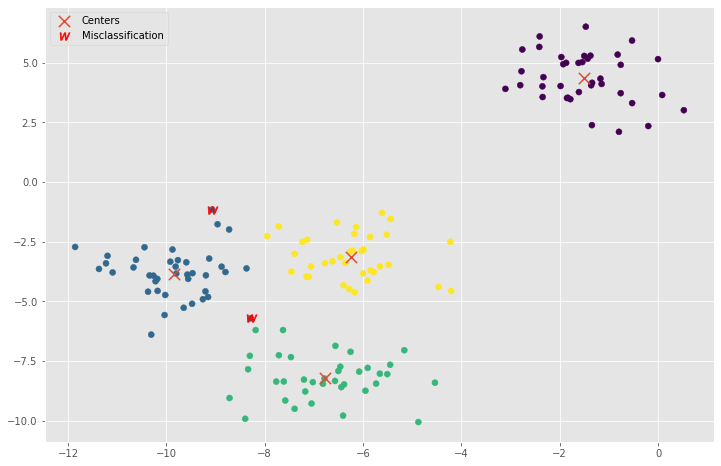

In [9]:
# изобразим модельную кластеризацию
plt.scatter(X[:, 0], X[:, 1], c=model_labels_ordered)
plt.scatter(model_centers[:, 0], model_centers[:, 1], marker='x', s=128, label='Centers')
plt.scatter(X[wrong, 0], X[wrong, 1], marker='$w$', c='red', s=128, label='Misclassification')
plt.legend()

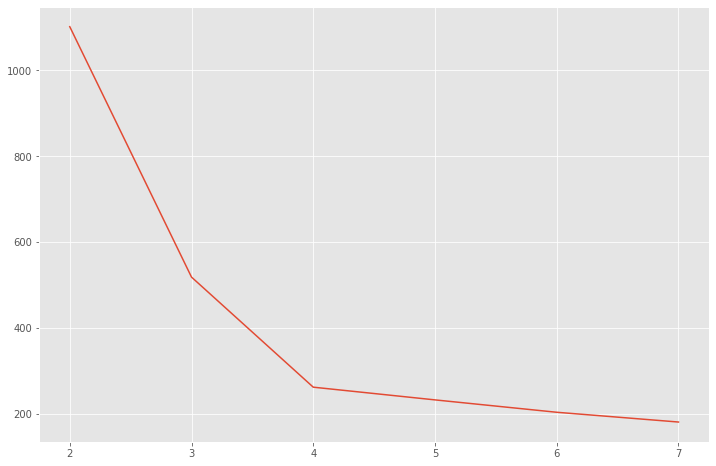

In [10]:
# Найдем методом локтя оптимальное число кластеров k

crit = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    crit.append(kmeans.inertia_)
    
plt.plot(range(2,8), crit)

# Видно, что хороший оптимум на 4